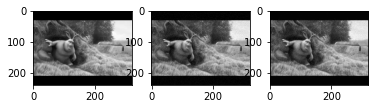

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

cap = cv2.VideoCapture('toon.flv')

# create a list of first 5 frames
img = [cap.read()[1] for i in range(5)]

# convert all to grayscale
gray = [cv2.cvtColor(i, cv2.COLOR_BGR2GRAY) for i in img]

# convert all to float64
gray = [np.float64(i) for i in gray]

# create a noise of variance 25
noise = np.random.randn(*gray[1].shape)*10

# Add this noise to images
noisy = [i+noise for i in gray]

# Convert back to uint8
noisy = [np.uint8(np.clip(i,0,255)) for i in noisy]

# Denoise 3rd frame considering all the 5 frames
dst = cv2.fastNlMeansDenoisingMulti(noisy, 2, 5, None, 4, 7, 35)

plt.subplot(131),plt.imshow(gray[2],'gray')
plt.subplot(132),plt.imshow(noisy[2],'gray')
plt.subplot(133),plt.imshow(dst,'gray')
plt.show()